# 시각화할 때 한국어 지원

In [146]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [147]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# MySQL과 파이썬 연결하기

In [148]:
pip install 'sqlalchemy<2.0' pymysql pandas==1.5.3

In [149]:
!pip install numpy==1.23.5

In [150]:
import pandas as pd
from sqlalchemy import create_engine

username = "chaeyun"
password="6149"
host="hk-toss-middle-project.cjkcuqkegqpx.eu-north-1.rds.amazonaws.com"
database_name="raw_data"

db_connection_str = f'mysql+pymysql://{username}:{password}@{host}/{database_name}'
db_connection = create_engine(db_connection_str)

# query 작성

In [151]:
# 2019~2021년 가구 데이터(HH) 추출
query_a_hh="""
SELECT HHID, DEBT, PROP, H_OOP, HEXP2, H_PHI_N
FROM raw_a_hh
"""
query_b_hh="""
SELECT HHID, DEBT, PROP, H_OOP, HEXP2, H_PHI_N
FROM raw_b_hh
"""
query_c_hh="""
SELECT HHID, DEBT, PROP, H_OOP, HEXP2, H_PHI_N
FROM raw_c_hh
"""

In [152]:
# 2019~2021년 가구원 데이터(IND) 추출
query_a_ind="""
SELECT HHID, PIDWON, SEX, BIRTH_Y, DISA_YN, DISA_TY
FROM raw_a_ind
"""
query_b_ind="""
SELECT HHID, PIDWON, SEX, BIRTH_Y, DISA_YN, DISA_TY
FROM raw_b_ind
"""
query_c_ind="""
SELECT HHID, PIDWON, SEX, BIRTH_Y, DISA_YN, DISA_TY
FROM raw_c_ind
"""

In [153]:
# 데이터프레임 만들기
a_hh = pd.read_sql(query_a_hh, con=db_connection)
b_hh = pd.read_sql(query_b_hh, con=db_connection)
c_hh = pd.read_sql(query_c_hh, con=db_connection)
a_ind = pd.read_sql(query_a_ind, con=db_connection)
b_ind = pd.read_sql(query_b_ind, con=db_connection)
c_ind = pd.read_sql(query_c_ind, con=db_connection)

In [154]:
# merge
a = a_ind.merge(a_hh, on='HHID', how='left')
b = b_ind.merge(b_hh, on='HHID', how='left')
c = c_ind.merge(c_hh, on='HHID', how='left')

# DEBT, PROP 시각화

## 결측치 확인
| 2019 | 전체 | NaN | 0.0 |
|---|---|---|---|
| DEBT | 6748 | 59 | 4023 |
| PROP | 6748 | 59 | 127 |

| 2020 | 전체 | NaN | 0.0 |
|---|---|---|---|
| DEBT | 6217 | 27 |  3671 |
| PROP | 6217 | 27 | 69 |

| 2021 | 전체 | NaN | 0.0 |
|---|---|---|---|
| DEBT | 5907 | 29 | 3449 |
| PROP | 5907 | 29 | 48 |


## 결측치 처리
결측치 제거 안하고 데이터 분포 확인
PROP은 0.0값이 상대적으로 적어 0값으로 결측치 처리를 해도 되지만 DEBT값은 0.0값이 많기 때문에 결측치 처리를 0.0으로 하기 애매함

근데 결측치 자체는 적으니까 0.0으로 처리해도 될 것 같음..

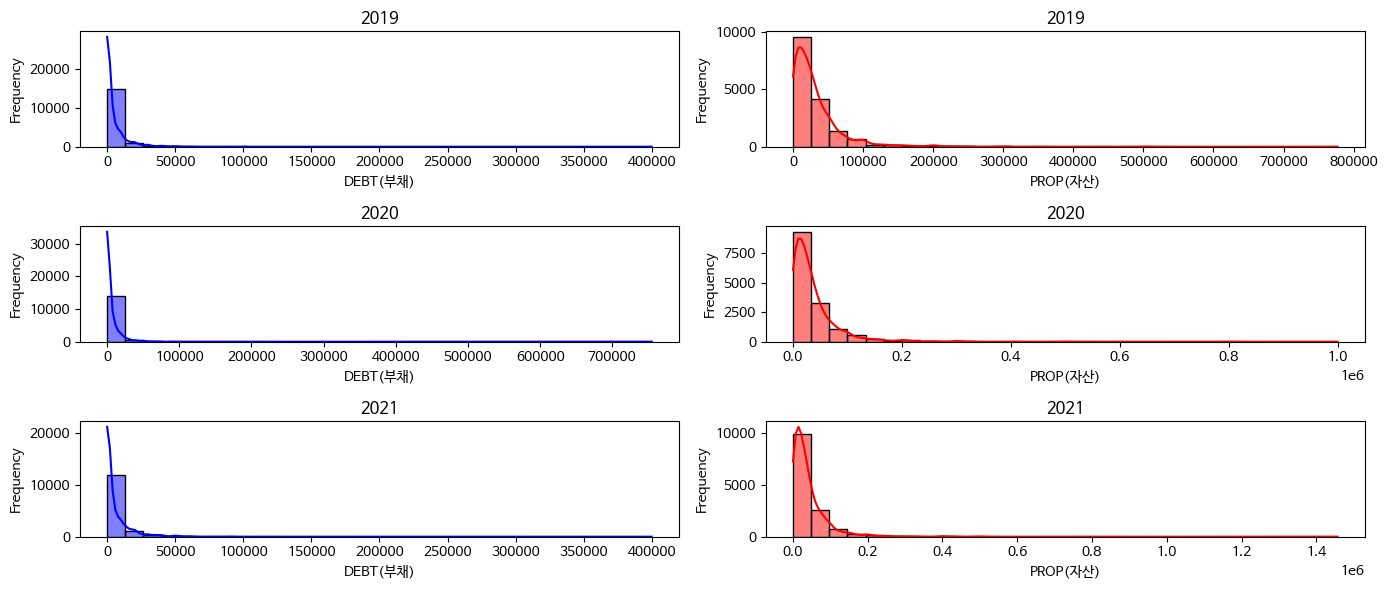

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(14, 6))

# DEBT 히스토그램
sns.histplot(a['DEBT'], bins=30, kde=True, color='blue', ax=axes[0, 0])
axes[0,0].set_title("2019")
axes[0,0].set_xlabel("DEBT(부채)")
axes[0,0].set_ylabel("Frequency")

sns.histplot(b['DEBT'], bins=30, kde=True, color='blue', ax=axes[1, 0])
axes[1,0].set_title("2020")
axes[1,0].set_xlabel("DEBT(부채)")
axes[1,0].set_ylabel("Frequency")

sns.histplot(c['DEBT'], bins=30, kde=True, color='blue', ax=axes[2, 0])
axes[2,0].set_title("2021")
axes[2,0].set_xlabel("DEBT(부채)")
axes[2,0].set_ylabel("Frequency")

# PROP 히스토그램
sns.histplot(a['PROP'], bins=30, kde=True, color='red', ax=axes[0,1])
axes[0,1].set_title("2019")
axes[0,1].set_xlabel("PROP(자산)")
axes[0,1].set_ylabel("Frequency")

sns.histplot(b['PROP'], bins=30, kde=True, color='red', ax=axes[1,1])
axes[1,1].set_title("2020")
axes[1,1].set_xlabel("PROP(자산)")
axes[1,1].set_ylabel("Frequency")

sns.histplot(c['PROP'], bins=30, kde=True, color='red', ax=axes[2,1])
axes[2,1].set_title("2021")
axes[2,1].set_xlabel("PROP(자산)")
axes[2,1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# 의료비 지원 여부에 따른 연간 의료비 지출 비교
2020년 결측치(-9.0) 한개 존재
제거하고 진행

연간 의료비 지출이 클수록 주변에서 의료비 지원을 받는다 .



In [156]:
b = b.loc[b['HEXP2'] != -9.0]
b['HEXP2'].value_counts()

,HEXP2
2.0,14129
1.0,652


<ipython-input-175-1cf485ef918a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HEXP2', y='H_OOP', data=a, palette='pastel', ax=axes[0])
<ipython-input-175-1cf485ef918a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HEXP2', y='H_OOP', data=b, palette='pastel', ax=axes[1])
<ipython-input-175-1cf485ef918a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HEXP2', y='H_OOP', data=c, palette='pastel', ax=axes[2])


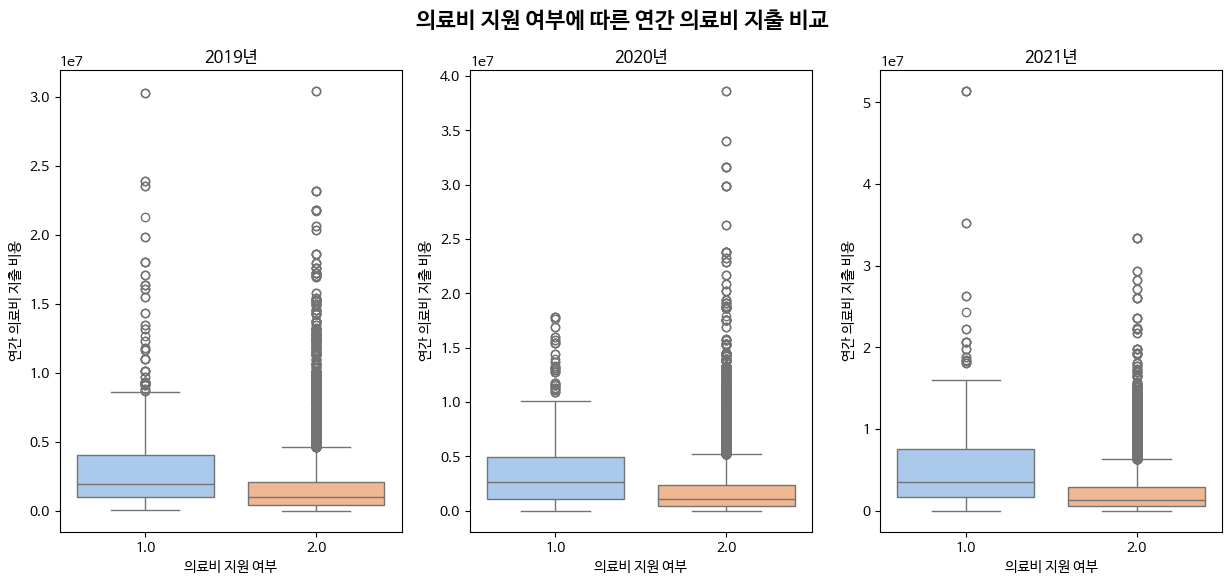

In [175]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

sns.boxplot(x='HEXP2', y='H_OOP', data=a, palette='pastel', ax=axes[0])
axes[0].set_title("2019년")
axes[0].set_xlabel("의료비 지원 여부")
axes[0].set_ylabel("연간 의료비 지출 비용")

sns.boxplot(x='HEXP2', y='H_OOP', data=b, palette='pastel', ax=axes[1])
axes[1].set_title("2020년")
axes[1].set_xlabel("의료비 지원 여부")
axes[1].set_ylabel("연간 의료비 지출 비용")

sns.boxplot(x='HEXP2', y='H_OOP', data=c, palette='pastel', ax=axes[2])
axes[2].set_title("2021년")
axes[2].set_xlabel("의료비 지원 여부")
axes[2].set_ylabel("연간 의료비 지출 비용")

fig.suptitle("의료비 지원 여부에 따른 연간 의료비 지출 비교", fontsize=16, fontweight="bold")
plt.show()

# 장애 유무에 따른 의료비 지원 여부

| DISA_YN | HEXP2 1.0 | HEXP2 2.0 |
|---------|-----|-----|
| 1.0 | 110 | 798 |
| 2.0 | 742 | 13091 |

장애가 있는 경우 의료비 지출이 심하기 때문에 의료비 부담이 큰 것으로 보임

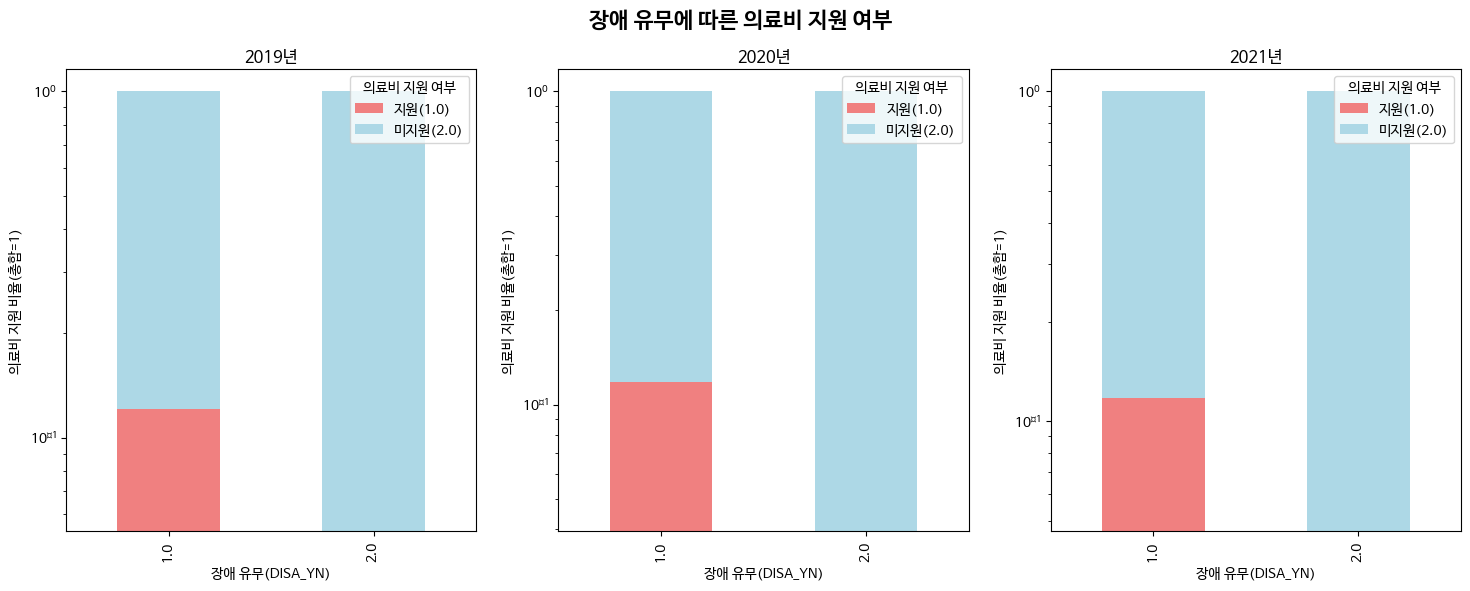

In [174]:
support_ratio_a = a.groupby("DISA_YN")["HEXP2"].value_counts(normalize=True).unstack()
support_ratio_b = b.groupby("DISA_YN")["HEXP2"].value_counts(normalize=True).unstack()
support_ratio_c = c.groupby("DISA_YN")["HEXP2"].value_counts(normalize=True).unstack()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

support_ratio_a.plot(kind="bar", stacked=True, color=["lightcoral", "lightblue"], log=True, ax=axes[0])
axes[0].set_title("2019년")
axes[0].set_xlabel("장애 유무(DISA_YN)")
axes[0].set_ylabel("의료비 지원 비율(총합=1)")
axes[0].legend(title="의료비 지원 여부", labels=["지원(1.0)", "미지원(2.0)"])

support_ratio_b.plot(kind="bar", stacked=True, color=["lightcoral", "lightblue"], log=True, ax=axes[1])
axes[1].set_title("2020년")
axes[1].set_xlabel("장애 유무(DISA_YN)")
axes[1].set_ylabel("의료비 지원 비율(총합=1)")
axes[1].legend(title="의료비 지원 여부", labels=["지원(1.0)", "미지원(2.0)"])

support_ratio_c.plot(kind="bar", stacked=True, color=["lightcoral", "lightblue"], log=True, ax=axes[2])
axes[2].set_title("2021년")
axes[2].set_xlabel("장애 유무(DISA_YN)")
axes[2].set_ylabel("의료비 지원 비율(총합=1)")
axes[2].legend(title="의료비 지원 여부", labels=["지원(1.0)", "미지원(2.0)"])

fig.suptitle("장애 유무에 따른 의료비 지원 여부", fontsize=16, fontweight="bold")
plt.show()

# 장애 유무에 따른 가구 보험 개수
장애가 있는 가구보다 비장애 가구가 더 많은 보험에 가입하는 것을 알 수 있다.

-> 경제적 제약이나 보험 가입 제한 등의 이유가 있을 수 있음

장애가 있는 가구는 경제적 여건이 어려운 경우가 많을 것이라 예측

In [159]:
# a, b, c를 HHID를 기준으로 groupby
# DISA_YN : 1.0 -> 장애가 있는 사람이 있는 가정
#           2.0 -> 장애가 있는 사람이 없는 가정
a_hh['DISA_YN'] = a_hh['HHID'].map(a.groupby("HHID")['DISA_YN'].mean())
a_hh.loc[a_hh['DISA_YN'] != 2.0, 'DISA_YN'] = 1.0
b_hh['DISA_YN'] = b_hh['HHID'].map(b.groupby("HHID")['DISA_YN'].mean())
b_hh.loc[b_hh['DISA_YN'] != 2.0, 'DISA_YN'] = 1.0
c_hh['DISA_YN'] = c_hh['HHID'].map(c.groupby("HHID")['DISA_YN'].mean())
c_hh.loc[c_hh['DISA_YN'] != 2.0, 'DISA_YN'] = 1.0

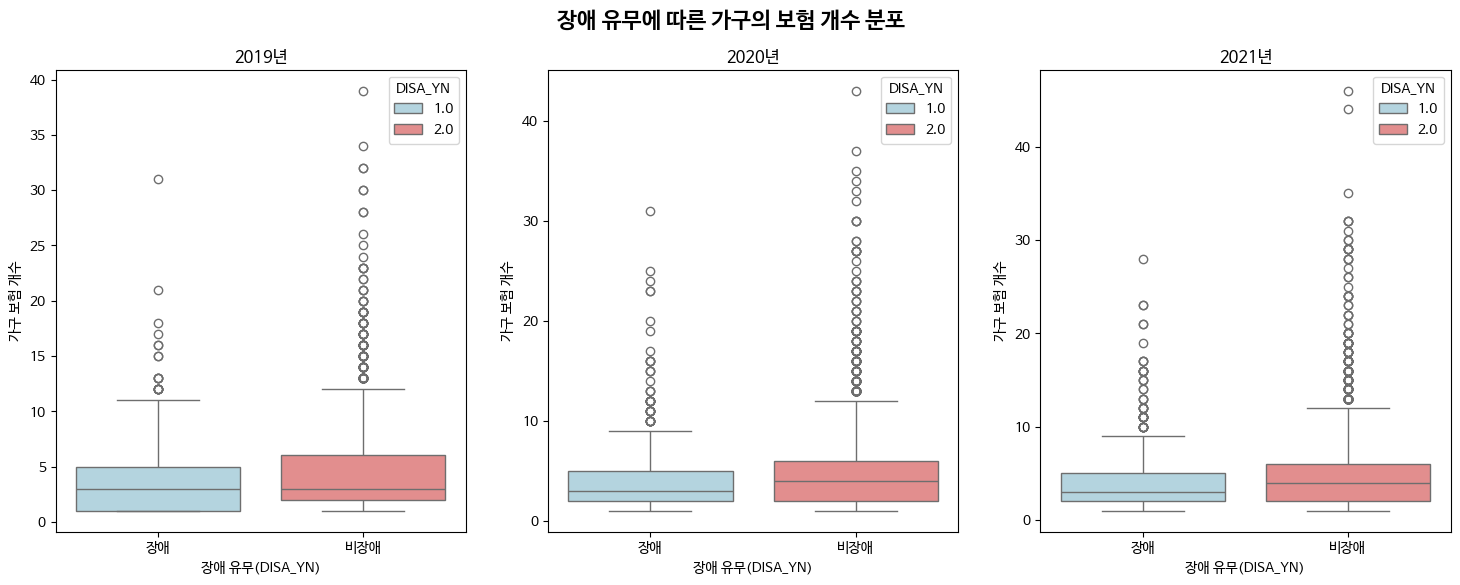

In [168]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x="DISA_YN", y="H_PHI_N", data=a_hh, palette=["lightblue", "lightcoral"], hue='DISA_YN', ax=axes[0])
axes[0].set_title("2019년")
axes[0].set_xlabel("장애 유무(DISA_YN)")
axes[0].set_ylabel("가구 보험 개수")
axes[0].set_xticks([0, 1], ["장애", "비장애"])

sns.boxplot(x="DISA_YN", y="H_PHI_N", data=b_hh, palette=["lightblue", "lightcoral"], hue='DISA_YN', ax=axes[1])
axes[1].set_title("2020년")
axes[1].set_xlabel("장애 유무(DISA_YN)")
axes[1].set_ylabel("가구 보험 개수")
axes[1].set_xticks([0, 1], ["장애", "비장애"])

sns.boxplot(x="DISA_YN", y="H_PHI_N", data=c_hh, palette=["lightblue", "lightcoral"], hue='DISA_YN', ax=axes[2])
axes[2].set_title("2021년")
axes[2].set_xlabel("장애 유무(DISA_YN)")
axes[2].set_ylabel("가구 보험 개수")
axes[2].set_xticks([0, 1], ["장애", "비장애"])

fig.suptitle("장애 유무에 따른 가구의 보험 개수 분포", fontsize=16, fontweight="bold")
plt.show()